In [3]:
import time
from selenium import webdriver
customOptions = webdriver.ChromeOptions()

In [4]:
from selenium.webdriver.common.keys import Keys

In [6]:
#driver = webdriver.Chrome('chromedriver',options=customOptions)


In [7]:
driver = webdriver.Chrome('chromedriver',options=customOptions)
URL='https://www.amazon.in/Redmi-Note-Pro-Storage-Processor/product-reviews/B07X4PKGSN/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=one_star'
driver.get(URL)

In [9]:
WebPage_Element=driver.find_element_by_partial_link_text('See all 6,009 critical reviews')
WebPage_Element.click()


In [11]:
#WebPage_Element.click()


In [12]:
TextBody = driver.find_element_by_css_selector('body')


In [13]:
TextBody.send_keys(Keys.CONTROL+'a')

In [14]:
import re
RawFullText=TextBody.text
CleanText=re.sub('\n',' ',RawFullText)
CleanText = re.sub(r'[^a-z A-Z]',r'',CleanText)

In [15]:
CleanText


'Skip to main content in   Hello Sign in Account  Lists Returns  Orders Try Prime Cart  All All Categories Deals Alexa Skills Amazon Devices Amazon Fashion Amazon Pantry Appliances Apps  Games Baby Beauty Books Car  Motorbike Clothing  Accessories Collectibles Computers  Accessories Electronics Furniture Garden  Outdoors Gift Cards Grocery  Gourmet Foods Health  Personal Care Home  Kitchen Industrial  Scientific Jewellery Kindle Store Luggage  Bags Luxury Beauty Movies  TV Shows Music Musical Instruments Office Products Pet Supplies Prime Video Shoes  Handbags Software Sports Fitness  Outdoors Tools  Home Improvement Toys  Games Under  Video Games Watches Go Hello Select your address Mobiles Best Sellers Todays Deals Computers Redmi Note  Pro Halo White GB RAM GB Storage with Helio GT  Customer reviews Customer reviews  out of   customer ratings  star   star   star   star   star  Redmi Note  Pro Halo White GB RAM GB Storage with Helio GT Processor byRedmi Size name GBColour Halo WhiteC

In [16]:
from textblob import TextBlob
SampleTextInBlobFormat = TextBlob(CleanText)

In [18]:
SampleTextInBlobFormat.sentiment

Sentiment(polarity=0.02921542375150623, subjectivity=0.4956238377887861)

In [19]:
NounPhrases=SampleTextInBlobFormat.noun_phrases
NounPhrases

WordList(['skip', 'main content', 'hello sign', 'account lists returns orders try prime cart', 'categories deals alexa skills amazon devices amazon', 'amazon pantry appliances apps', 'baby', 'beauty books', 'car motorbike clothing accessories collectibles computers accessories electronics furniture', 'outdoors', 'gourmet', 'personal care', 'kitchen', 'scientific jewellery kindle store luggage bags luxury', 'movies', 'shows', 'musical instruments', 'products pet supplies prime video shoes handbags software', 'fitness outdoors tools', 'improvement', 'video', 'watches', 'hello select', 'mobiles', 'sellers todays deals computers redmi', 'pro halo', 'gb ram gb storage', 'helio gt customer', 'customer', 'customer ratings star star star star star', 'redmi', 'pro halo', 'gb ram gb storage', 'helio gt processor', 'size', 'gbcolour halo whitechange', 'amazon', 'calculate star ratings', 'buying options', 'list top', 'positive review', 'positive reviews', 'mukesh', 'zakaaaaaaaaaaas reviewed', 'ind

In [20]:
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))

NewNounList

['skip',
 'main_content',
 'hello_sign',
 'account_lists_returns_orders_try_prime_cart',
 'categories_deals_alexa_skills_amazon_devices_amazon',
 'amazon_pantry_appliances_apps',
 'baby',
 'beauty_books',
 'car_motorbike_clothing_accessories_collectibles_computers_accessories_electronics_furniture',
 'outdoors',
 'gourmet',
 'personal_care',
 'kitchen',
 'scientific_jewellery_kindle_store_luggage_bags_luxury',
 'movies',
 'shows',
 'musical_instruments',
 'products_pet_supplies_prime_video_shoes_handbags_software',
 'fitness_outdoors_tools',
 'improvement',
 'video',
 'watches',
 'hello_select',
 'mobiles',
 'sellers_todays_deals_computers_redmi',
 'pro_halo',
 'gb_ram_gb_storage',
 'helio_gt_customer',
 'customer',
 'customer_ratings_star_star_star_star_star',
 'redmi',
 'pro_halo',
 'gb_ram_gb_storage',
 'helio_gt_processor',
 'size',
 'gbcolour_halo_whitechange',
 'amazon',
 'calculate_star_ratings',
 'buying_options',
 'list_top',
 'positive_review',
 'positive_reviews',
 'mukesh',

In [21]:
import nltk

In [24]:
sampleSentence = nltk.word_tokenize(CleanText)
sampleSentencePOS = nltk.pos_tag(sampleSentence)
OnlyAdjectives= (" ").join([POStags[0] for POStags in sampleSentencePOS if POStags[1] in ['JJ','JJR','JJS']])
print ('Adjectives: ', OnlyAdjectives)
print('Overall sentiment score of ajdectives: ',TextBlob(OnlyAdjectives).sentiment)

Adjectives:  main positive positive helpful critical critical ali long more long professional happy update more helpful Most recent positive critical critical text text video reviewsCritical long more long professional happy update helpful praveen helpful helpful poor difficult helpful mobile Other awesome good helpful bad real helpful pankaj clear helpful kamal many signal weak side big old u plz helpful low more lowNot sure faulty new helpful mobile green cheap better black average overall bad helpful fast Everyday
Overall sentiment score of ajdectives:  Sentiment(polarity=0.12539525691699605, subjectivity=0.519850680720246)


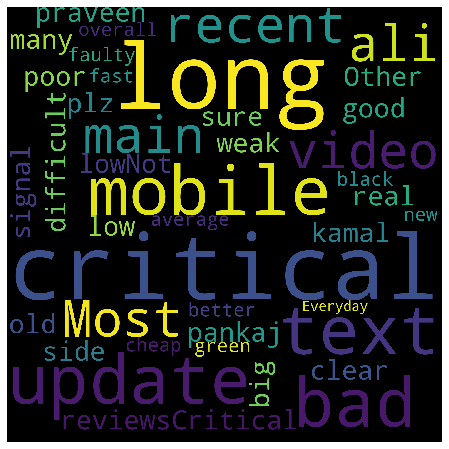

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

customStopwords=list(STOPWORDS) + ['awesome','happy','positive','helpful','professional']
wordcloudimage = WordCloud(max_words=50,
                           font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords + ['nlp'],
                            width=2000,
                            height=2000
                          ).generate(OnlyAdjectives)

plt.figure(figsize=(8,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()